In [1]:
import glob, json, logging, os, skimage.color, skimage.draw, skimage.io, sys, utils, visualize
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict, Counter
from jsonmerge import merge

In [2]:
%matplotlib inline

In [3]:
#input_frames_path = '/mnt/raw/frames'

#encodings_path = '/mnt/raw/frames/encoding.csv'

input_frames_path = 'C:\\Users\\stvanbod\\Documents\\NT Fisheries\\Matching\\'

encodings_path = 'C:\\Users\\stvanbod\\Documents\\NT Fisheries\\encoding.csv'

### Class Distribution

In [107]:
def load_json_property(file_path, p):
    values = []

    def _decode_dict(a_dict):
        try:
            values.append(a_dict[p])
            if (a_dict[p] == 'xxx'):
                print(a_dict)
                print(a_dict[p])
        except KeyError: pass
        return a_dict

    if file_path:
        with open(file_path, 'r') as f:
            data = json.load(f, object_hook=_decode_dict)

    return values

In [116]:
def merge_json_property(folders, p):
    values = [];

    for folder in folders:
        for file_path in glob.iglob(os.path.join(folder, '*.json')):
            if file_path:
                print('Found JSON {0}'.format(file_path))
                values.extend(load_json_property(file_path, p))
    return values

In [186]:
out_folder_name = 'proposed'

folders = []

for dirpath, dirnames, filenames in os.walk(input_frames_path):
    if out_folder_name in dirpath:
        folders.append(dirpath)

In [187]:
values = merge_json_property(folders, 'Category')

Found JSON C:\Users\stvanbod\Documents\NT Fisheries\Matching\BICPB1-20161011-3.MP4\proposed\BICPB1-20161011-3.MP4.json
Found JSON C:\Users\stvanbod\Documents\NT Fisheries\Matching\BICPB2-20161011-1.MP4\proposed\BICPB2-20161011-1.MP4.json
Found JSON C:\Users\stvanbod\Documents\NT Fisheries\Matching\BICPB2-20161011-3.MP4\proposed\BICPB2-20161011-3.MP4.json
Found JSON C:\Users\stvanbod\Documents\NT Fisheries\Matching\BICPB3-20160417-1.MP4\proposed\BICPB3-20160417-1.MP4.json
Found JSON C:\Users\stvanbod\Documents\NT Fisheries\Matching\BICPB3-20161011-3.MP4\proposed\BICPB3-20161011-3.MP4.json
Found JSON C:\Users\stvanbod\Documents\NT Fisheries\Matching\BIH1B3-20161010-1.MP4\proposed\BIH1B3-20161010-1.MP4.json
Found JSON C:\Users\stvanbod\Documents\NT Fisheries\Matching\BIH2B3-20161010-2.MP4\proposed\BIH2B3-20161010-2.MP4.json
Found JSON C:\Users\stvanbod\Documents\NT Fisheries\Matching\BIH2B3-20161010-3.MP4\proposed\BIH2B3-20161010-3.MP4.json
Found JSON C:\Users\stvanbod\Documents\NT Fisher

In [188]:
counts = Counter(values)

In [189]:
categories = sorted([(category, count) for category, count in counts.items()], key=lambda x: x[1])
categories.reverse()

In [190]:
encodings = pd.read_csv(encodings_path)

In [192]:
df = pd.DataFrame(categories)

In [193]:
df = df.rename(columns={0:'Category', 1:'Count'})

In [194]:
df = pd.merge(df, encodings, how='left', left_on='Category', right_on='Code')

In [196]:
df[['Count', 'Species']]

,Count,Species
0,1067,Striped Snapper
1,269,Goldspotted cod
2,173,Grass Emporer
3,169,Golden Snapper
4,101,Indonesian Snapper
5,55,Blue Tuskfish
6,39,Northern Black Jewfish
7,26,18
8,10,Inshore Surgeonfish
9,5,Spotted Javelinfish


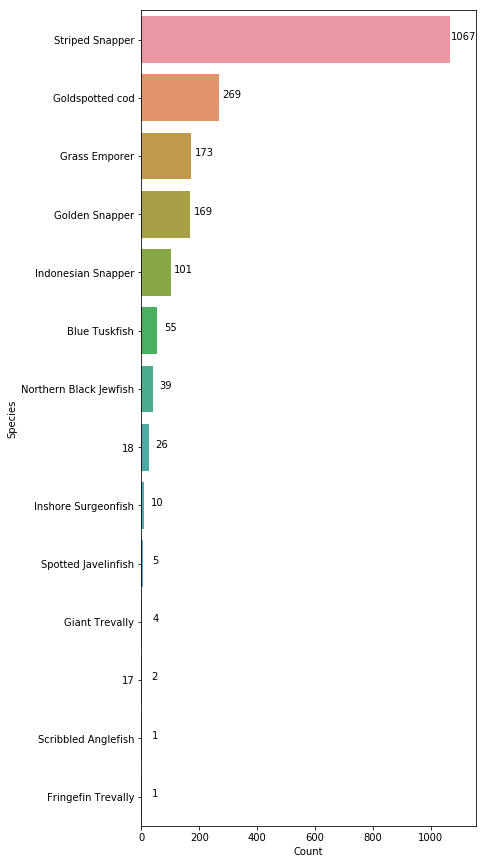

In [203]:
xlim = 0

f, ax = plt.subplots(figsize=(6, 15))

ax = sns.barplot(x="Count", y="Species", data=df);

for index, row in df.iterrows():
    x = row.Count + 45
    y = index
    s = row.Count
    if x > xlim:
        xlim = x + 45
    ax.text(x, y, s, ha="center")

ax.set_xlim([0, xlim])

plt.show()